In [16]:
%matplotlib inline 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import pybinding as pb

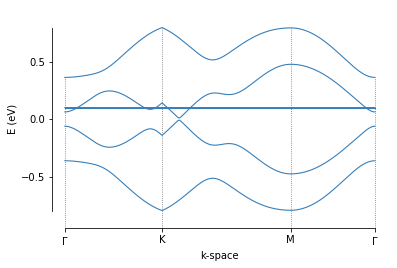

In [8]:
from math import sqrt
from math import sqrt, pi, atan, tan, cos
h=0
a_cc1=1
theta=atan(h/a_cc1)
a=tan(theta)
c=cos(theta)**2

def plot1():
    t1=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2
             ,(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
             cos(pi/6)*c*a*(Vpppi-Vppsig)]
        ,[(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
          Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
          cos(pi/3)*a*c*(Vppsig-Vpppi)]
        ,[cos(pi/6)*c*a*(Vpppi-Vppsig),
          cos(pi/3)*a*c*(Vppsig-Vpppi),
          cos(pi/3)*a*c*(Vppsig-Vpppi)]]

    t2=[[Vpppi*(1-c*cos(pi/6)**2)+Vppsig*c*cos(pi/6)**2,
         -(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
         cos(pi/6)*c*a*(Vpppi-Vppsig)]
    ,[-(Vpppi-Vppsig)*c*cos(pi/3)*cos(pi/6),
      Vpppi*(1-c*cos(pi/3)**2)+Vppsig*c*cos(pi/3)**2,
      cos(pi/3)*a*c*(Vppsig-Vpppi)]
    ,[cos(pi/6)*c*a*(Vpppi-Vppsig),
      cos(pi/3)*a*c*(Vppsig-Vpppi),
      cos(pi/3)*a*c*(Vppsig-Vpppi)]]

    t3=[[Vpppi,
         c*Vppsig+(1-c)*Vpppi,
         0]
    ,[0,
      c*Vppsig+(1-c)*Vpppi,
      a*c*(Vpppi-Vppsig)]
    ,[0,
      a*c*(Vpppi-Vppsig),
      cos(pi/3)*a*c*(Vppsig-Vpppi)]]
    def monolayer_sb():
        a1 = 0.24595   # [nm] unit cell length
        a_cc = 0.142 # [nm] carbon-carbon distance
        t = -1.8      # [eV] nearest neighbour hopping

        lat = pb.Lattice(a1=[a1, 0],
                         a2=[a1/2, a1/2 * sqrt(3)])
        lat.add_sublattices(('A', [0, -a_cc/2,0], [0,0,.1]),
                            ('B', [0,  a_cc/2,h],[0,0,.1]))
        lat.add_hoppings(
            # inside the main cell
            ([0,  0], 'A', 'B', t1),
            # between neighboring cells
            ([1, -1], 'A', 'B', t2),
            ([0, -1], 'A', 'B', t3)
        )
        return lat

    #fig, ax = plt.subplots(nrows=1, ncols=3)
    lattice = monolayer_sb()
    # lattice.plot()
    # plt.show()
    # lattice.plot(axes='yz')
    # plt.show()
    # lattice.plot_brillouin_zone()
    # plt.show()
    model = pb.Model(
        lattice,
        pb.translational_symmetry()
    )
    solver = pb.solver.lapack(model)

    Gamma = [0, 0]
    K1 = [-4*pi / (3*sqrt(3)*a_cc1), 0]
    M = [0, 2*pi / (3*a_cc1)]
    K2 = [2*pi / (3*sqrt(3)*a_cc1), 2*pi / (3*a_cc1)]

    bands = solver.calc_bands( Gamma, K1,M, Gamma,)
    bands.plot(point_labels=[ r'$\Gamma$','K', 'M', r'$\Gamma$'])
a_cc1 = 0.142 
h=0.00

Vpppi=.2
Vppsig=-.3
plot1()

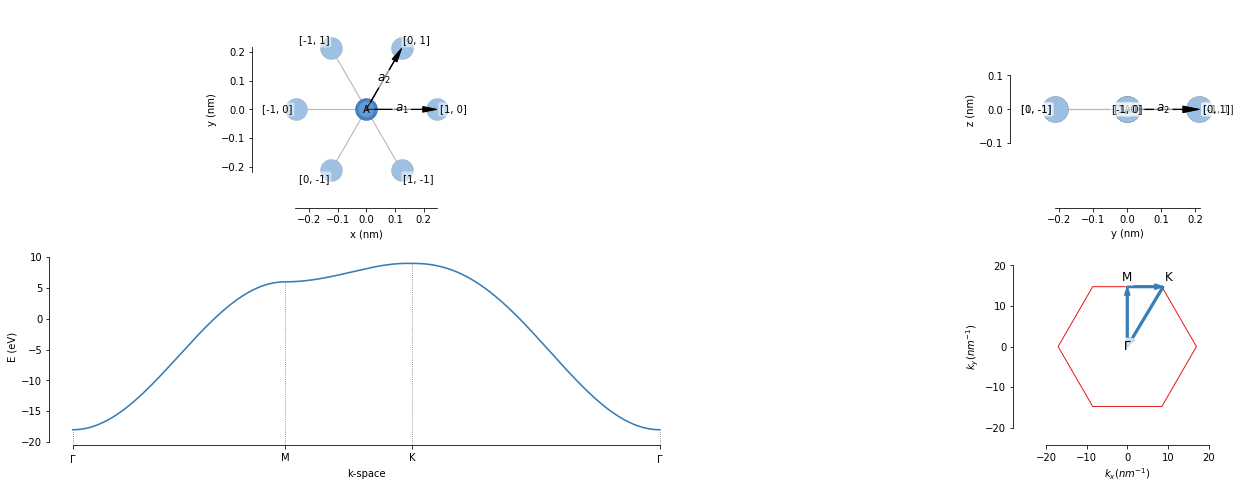

In [389]:
from math import sqrt, pi


plt.figure(1, figsize=(25, 8))


a = 0.24595  # [nm] unit cell length
# [nm] carbon-carbon distance
#t = -2.8      # [eV] nearest neighbour hopping

Gamma = [0, 0]
K1 = [pi*1.2 / (sqrt(3)*a), 2*pi / (sqrt(3)*a)]
M = [0, 2*pi / (sqrt(3)*a)]
#K2 = [2*pi / (3*sqrt(3)*a), 2*pi / (3*a/2)]
def monolayer_graphene(t1=2,t2=0,t3=.1):
    lat = pb.Lattice(a1=[a, 0], a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, 0]))#,('B', [0, 0,-.1],-2))
                        
    lat.add_hoppings(
                     ([1, -1], 'A', 'A', t1),
                     ([0, -1], 'A', 'A', t1),
                     ([1, 0], 'A', 'A', t1))
#                     ([2, 0], 'A', 'A', t2),
#                     ([1, 1], 'A', 'A', t2),
#                     ([2, -1], 'A', 'A', t2))
           

    return lat


model = pb.Model(
    monolayer_graphene(t1=-3+0j,t2=0,t3=-.1),  
    pb.translational_symmetry()
)
solver = pb.solver.lapack(model)
bands = solver.calc_bands( Gamma, M, K1,Gamma)





lattice = monolayer_graphene()
plt.subplot(221)
lattice.plot()



plt.subplot(222)
lattice.plot("yz")



plt.subplot(223)
bands.plot(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])




plt.subplot(224)
model.lattice.plot_brillouin_zone(decorate=False)
bands.plot_kpath(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])
#plt.show()

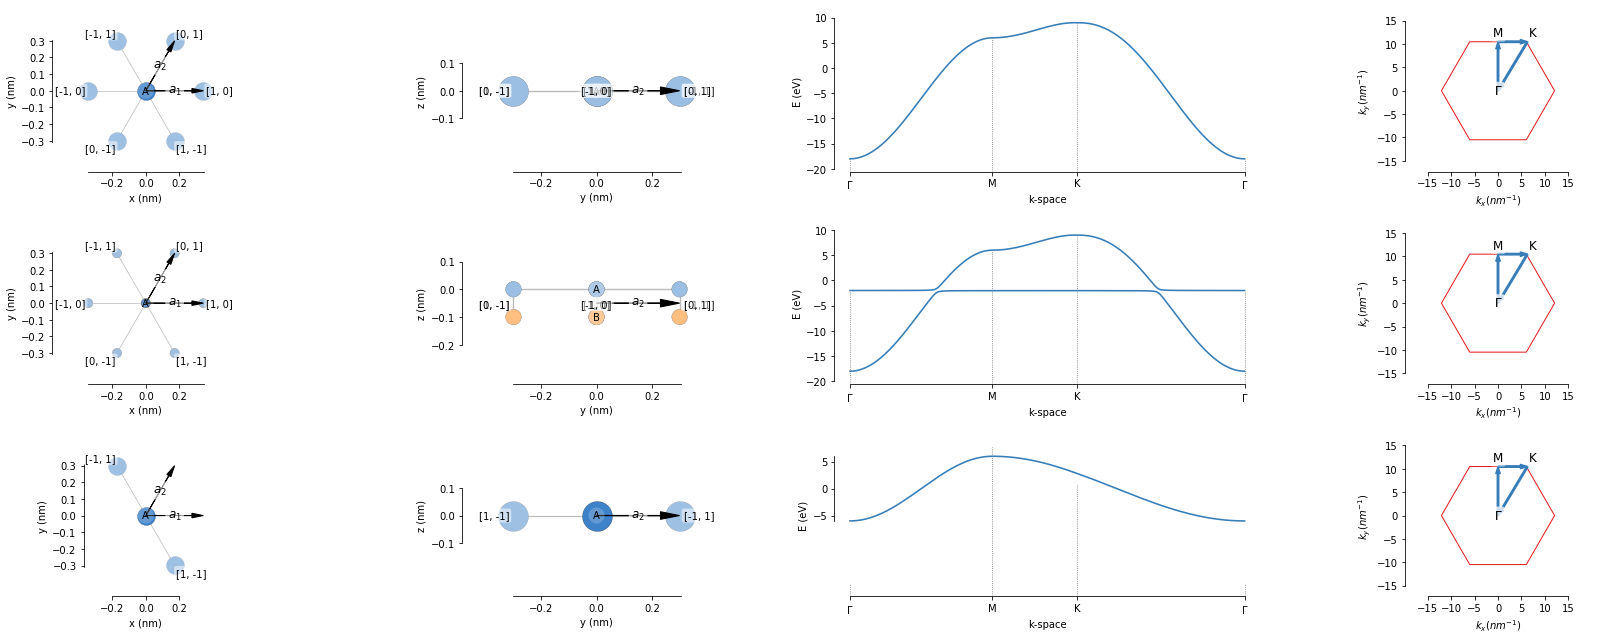

In [413]:
from math import sqrt, pi


plt.figure(1, figsize=(25, 9))


a = 0.34595  # [nm] unit cell length
# [nm] carbon-carbon distance
#t = -2.8      # [eV] nearest neighbour hopping

Gamma = [0, 0]
K1 = [pi*1.2 / (sqrt(3)*a), 2*pi / (sqrt(3)*a)]
M = [0, 2*pi / (sqrt(3)*a)]
#K2 = [2*pi / (3*sqrt(3)*a), 2*pi / (3*a/2)]
def monolayer_graphene(t1=2,t2=0,t3=.1):
    lat = pb.Lattice(a1=[a, 0], a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, 0]))#,('B', [0, 0,-.1],-2))
                        
    lat.add_hoppings(
                     ([1, -1], 'A', 'A', t1),
                     ([0, -1], 'A', 'A', t1),
                     ([1, 0], 'A', 'A', t1))
           

    return lat


def monolayer_graphene_line(t1=2,t2=0,t3=.1):
    lat = pb.Lattice(a1=[a, 0], a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, 0]))#,('B', [0, 0,-.1],-2))
                        
    lat.add_hoppings(
                     ([1, -1], 'A', 'A', t1))
                     #([0, -1], 'A', 'A', t1))
                     #([1, 0], 'A', 'A', t1))
#                     ([2, 0], 'A', 'A', t2),
#                     ([1, 1], 'A', 'A', t2),
#                     ([2, -1], 'A', 'A', t2))
           

    return lat
def monolayer_graphene_3d(t1=2,t2=0,t3=.1):
    lat = pb.Lattice(a1=[a, 0], a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, 0]),('B', [0, 0,-.1],-2))
                        
    lat.add_hoppings(([0, 0], 'A', 'B', t2),
                     ([1, -1], 'A', 'A', t1),
                     ([0, -1], 'A', 'A', t1),
                     ([1, 0], 'A', 'A', t1))


    return lat








model = pb.Model(
    monolayer_graphene(t1=-3+0j,t2=0,t3=-.1),  
    pb.translational_symmetry()
)
solver = pb.solver.lapack(model)
bands = solver.calc_bands( Gamma, M, K1,Gamma)


lattice = monolayer_graphene()
plt.subplot(341)
lattice.plot()

plt.subplot(342)
lattice.plot("yz")

plt.subplot(343)
bands.plot(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])


plt.subplot(344)
model.lattice.plot_brillouin_zone(decorate=False)
bands.plot_kpath(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])


#---------------------------------------------------------------------------------------------

model = pb.Model(
    monolayer_graphene_3d(t1=-3+0j,t2=.4,t3=-.1),  
    pb.translational_symmetry()
)
solver = pb.solver.lapack(model)
bands = solver.calc_bands( Gamma, M, K1,Gamma)



lattice = monolayer_graphene_3d()
plt.subplot(345)
lattice.plot()

plt.subplot(346)
lattice.plot("yz")

plt.subplot(347)
bands.plot(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])


plt.subplot(348)
model.lattice.plot_brillouin_zone(decorate=False)
bands.plot_kpath(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])


#---------------------------------------------------------------------------------------------
model = pb.Model(
    monolayer_graphene_line(t1=-3+0j,t2=0,t3=-.1),  
    pb.translational_symmetry()
)
solver = pb.solver.lapack(model)
bands = solver.calc_bands( Gamma, M, K1,Gamma)


lattice = monolayer_graphene_line()
plt.subplot(3,4,9)
lattice.plot()

plt.subplot(3,4,10)
lattice.plot("yz")

plt.subplot(3,4,11)
bands.plot(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])
plt.ylim([-20,10])

plt.subplot(3,4,12)
model.lattice.plot_brillouin_zone(decorate=False)
bands.plot_kpath(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])



plt.tight_layout()